
# Score Calculation

The score calculation is to be part of `run_opinion_logic()` after development through the flag `compute_scores`.

In [1]:
import os
import pandas as pd
# from math import log
import numpy as np

from src.opinion_logic import run_opinion_logic, ALL_KEYWORDS_EXTENDED
from src.utils import show, parse_config
from src.data_prep import prepare_speech_data

CONFIG = parse_config()

In [2]:
%%time

def process():
    print("Not using cached df, processing now")
    df = prepare_speech_data(ALL_KEYWORDS_EXTENDED)
    df = run_opinion_logic(df, compute_scores=False)
    # df = run_opinion_logic(df, subset_start=20000, subset_end=20100)
    return df

if CONFIG["use_cache"]:
    if os.path.exists(CONFIG["processed_df_cache"]):
        print("Using cached, previously processed dataframe")
        df = pd.read_pickle(CONFIG["processed_df_cache"])
    else:
        print("No cached data available")
        df = process()
else:
    df = process()

Using cached, previously processed dataframe


FileNotFoundError: [Errno 2] No such file or directory: 'data/processed_df.pkl'

In [ ]:
# query df on focus area index 2009-2015 here!
df.query("electoral_term  >= 17 and session >= 94 and electoral_term <= 19")

,index,id,session,electoral_term,first_name,last_name,politician_id,text,faction_id,document_url,...,NE_s,CE_descriptive,CE_s,subtree_length_counter,ancestors_length_counter,negation_counter,third_person_counter,score_neutral_counter,score_positive_counter,score_negative_counter
18248,18248,752582,96,17,Gregor,Gysi,11000756,Herr Präsident! Meine Damen und Herren! In Jap...,6,https://dip21.bundestag.de/dip21/btp/17/17096.pdf,...,0.0,[],0.0,15,68,1,0,77,4,2
18249,18249,753235,98,17,Oliver,Krischer,11004081,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,3,https://dip21.bundestag.de/dip21/btp/17/17098.pdf,...,0.0,[],0.0,0,9,0,0,9,0,0
18323,18323,752192,94,17,Elke,Ferner,11000535,Herr Präsident! Liebe Kollegen und Kolleginnen...,23,https://dip21.bundestag.de/dip21/btp/17/17094.pdf,...,0.0,[],0.0,0,2,0,0,2,0,0
18324,18324,752304,94,17,Halina,Wawzyniak,11004185,Frau Präsidentin! Meine sehr geehrten Damen un...,6,https://dip21.bundestag.de/dip21/btp/17/17094.pdf,...,0.0,"[[ergreifen, 0.0, 1, 1], [Profitsteigerung, 0....",0.0,0,8,0,0,8,0,0
18325,18325,752296,94,17,Martin,Dörmann,11003517,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,23,https://dip21.bundestag.de/dip21/btp/17/17094.pdf,...,0.0,"[[Inhaltekontrolle, 0.0, 1, 1], [geben, 0.0, 1...",0.0,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24533,24533,1052422,202,19,Oliver,Krischer,11004081,Auf die Polemik am Schluss muss man gar nicht...,3,https://dip21.bundestag.de/dip21/btp/19/19202.pdf,...,0.0,[],0.0,12,17,0,0,29,0,0
24534,24534,1052424,202,19,Andreas,Lenz,11004339,Sehr geehrter Herr Präsident! Sehr geehrte Da...,4,https://dip21.bundestag.de/dip21/btp/19/19202.pdf,...,-0.7,"[[brauchen, -0.0, -1, 1], [Lassen, 0.0, 1, 1]]",0.0,13,34,2,0,46,0,1
24535,24535,1052426,202,19,Johann,Saathoff,11004393,Sehr geehrter Herr Präsident! Liebe Kolleginn...,23,https://dip21.bundestag.de/dip21/btp/19/19202.pdf,...,0.0,[],0.0,0,12,0,0,11,0,1
24536,24536,1052644,202,19,Manfred,Todtenhausen,11004222,"Herr Präsident, ich gönne Ihnen die Atempause...",13,https://dip21.bundestag.de/dip21/btp/19/19202.pdf,...,0.0,[],0.0,0,4,0,0,4,0,0


In [ ]:
show(df)

,index,id,session,electoral_term,first_name,last_name,politician_id,text,faction_id,document_url,position_short,position_long,date,after_shock,doc_index,speech_length,keyword_counter,keywords,AN_descriptive,AN_s,PN_descriptive,PN_s,NE_descriptive,NE_s,CE_descriptive,CE_s,subtree_length_counter,ancestors_length_counter,negation_counter,third_person_counter,score_neutral_counter,score_positive_counter,score_negative_counter
0,0,144,7,1,NaN,Wellhausen,11002468,Meine verehrten Damen und Herren! Ich hatte di...,13,https://dip21.bundestag.de/dip21/btp/01/01007.pdf,Member of Parliament,NaN,1949-09-22,False,0,2443,1,[Energie],[],0.0,[],0.0,"[[etwas, 0.0, 1, 1], [bringen, 0.0, 1, 1], [me...",0.0,[],0.0,1,2,0,0,3,0,0
1,1,237,9,1,NaN,rische,11001857,Meine Damen und Herren! Seit einigen Tagen wir...,20,https://dip21.bundestag.de/dip21/btp/01/01009.pdf,Member of Parliament,NaN,1949-09-28,False,1,1747,7,"[Kohle, Kohle, Kohle, Kohle, Kohle, Kohle, Kohle]",[],0.0,[],0.0,[],0.0,"[[eigen, 0.0, 1, 1], [Aufbau, 0.0, 1, 1], [züg...",-1.4,12,6,0,0,16,0,2
2,2,239,9,1,NaN,loritz,11001375,Meine sehr verehrten Damen und Herren! Ich gla...,25,https://dip21.bundestag.de/dip21/btp/01/01009.pdf,Member of Parliament,NaN,1949-09-28,False,2,1841,2,"[Kohle, Kohle]",[],0.0,[],0.0,[],0.0,"[[einkaufen, 0.0, 1, 1], [stehen, 0.0, 1, 1], ...",0.0,6,4,0,0,10,0,0
3,3,224,9,1,NaN,adenauer,11000009,Ich habe dem Hohen Hause im Namen der Bundesre...,-1,https://dip21.bundestag.de/dip21/btp/01/01009.pdf,Chancellor,NaN,1949-09-28,False,3,656,1,[Kohle],[],0.0,[],0.0,[],0.0,"[[Interesse, 0.0, 1, 1], [gewährleisten, 0.7, ...",0.7,0,4,0,0,3,1,0
4,4,231,9,1,NaN,höpker-aschoff,11000927,Meine Damen und Herren! Als uns vor einigen Mo...,13,https://dip21.bundestag.de/dip21/btp/01/01009.pdf,Member of Parliament,NaN,1949-09-28,False,4,1272,4,"[Kohle, Kohle, Kohle, Kohle]",[],0.0,[],0.0,[],0.0,"[[Exportgut, 0.0, 1, 1], [Verlangen, 0.0, 1, 1...",0.0,2,13,0,0,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24533,24533,1052422,202,19,Oliver,Krischer,11004081,Auf die Polemik am Schluss muss man gar nicht...,3,https://dip21.bundestag.de/dip21/btp/19/19202.pdf,Member of Parliament,NaN,2020-12-17,True,24533,613,7,"[Energien, Energien, Windenergie, Energien, En...","[[Ausbau, 0.0, 1, 1]]",0.0,[],0.0,"[[Erneuerbare, 0.0, 1, 1], [Energie, 0.0, 1, 1...",0.0,[],0.0,12,17,0,0,29,0,0
24534,24534,1052424,202,19,Andreas,Lenz,11004339,Sehr geehrter Herr Präsident! Sehr geehrte Da...,4,https://dip21.bundestag.de/dip21/btp/19/19202.pdf,Member of Parliament,NaN,2020-12-17,True,24534,891,16,"[Energien, Energiewende, Energien, EEG, EEG, E...","[[betreiben, 0.0, 1, 1], [Leistung, 0.0, 1, 1]...",0.0,[],0.0,"[[erneuerbaren, 0.0, 1, 1], [Energie, 0.0, 1, ...",-0.7,"[[brauchen, -0.0, -1, 1], [Lassen, 0.0, 1, 1]]",0.0,13,34,2,0,46,0,1
24535,24535,1052426,202,19,Johann,Saathoff,11004393,Sehr geehrter Herr Präsident! Liebe Kolleginn...,23,https://dip21.bundestag.de/dip21/btp/19/19202.pdf,Member of Parliament,NaN,2020-12-17,True,24535,612,5,"[Energiewende, Energiewende, Strom, Stromerzeu...","[[Gemeinde, 0.0, 1, 1], [finden, 0.0, 1, 1], [...",-1.0,[],0.0,"[[nutzen, 0.0, 1, 1], [betreiben, 0.0, 1, 1], ...",0.0,[],0.0,0,12,0,0,11,0,1
24536,24536,1052644,202,19,Manfred,Todtenhausen,11004222,"Herr Präsident, ich gönne Ihnen die Atempause...",13,https://dip21.bundestag.de/dip21/btp/19/19202.pdf,Member of Parliament,NaN,2020-12-17,True,24536,419,1,[Energie],[],0.0,[],0.0,"[[Wirtschaft, 0.0, 1, 1], [Bundesministerium, ...",0.0,[],0.0,0,4,0,0,4,0,0


### Score Splitting at Inflection Point
As it is essential to compare opinions before and after the external shock, both values extracted from the calculated scores in the various categories in conjunction with the dummy variable *after_shock*, which is 0 for pre-shock and 1 for after-shock speech fragments. <br>
To do so, pre-shock and after-shock columns for each category are created (i.e. *NE_sp*, *PN_sa*). These are children to the main category score columns (i.e. *NE_s*, *PN_s*). Initially, the children columns take on the same value as the parents. Then, the values are adjusted to 0 if the *after_shock* variable value (0 or 1) does not match with the children score column suffices (pre or after). Accordingly, for all rows with a *after_shock* value of 1, the pre score will be reset to 0.

In [ ]:
# Sets all children score columns to equal the parents' values
df["AN_sp"] = df["AN_s"]
df["AN_sa"] = df["AN_s"]

df["PN_sp"] = df["PN_s"]
df["PN_sa"] = df["PN_s"]

df["NE_sp"] = df["NE_s"]
df["NE_sa"] = df["NE_s"]

df["CE_sp"] = df["CE_s"]
df["CE_sa"] = df["CE_s"]

In [ ]:
# Adjusts children score columns for their after_shock values
df.loc[df.after_shock == 1, ["AN_sp", "PN_sp", "NE_sp", "CE_sp"]] = 0
df.loc[df.after_shock == 0, ["AN_sa", "PN_sa", "NE_sa", "CE_sa"]] = 0

### Score Calculation
The main score is calculated using three of the four keyword lists. The score is designed to be positive to reflect progressiveness. Therefore, anti-nuclear energy opinions are added, pro-nuclear energy opinions are substracted, and conservative energy politics opinions are substracted as well, as those do not reflect the turnaround performed by politics. Solely opinions about energy politics which do not fall into any of the other three categories are not included in the score but are kept for reference.

In [ ]:
df["score"] = df["AN_s"] - df["PN_s"] - df["CE_s"]
df["score_p"] = df["AN_sp"] - df["PN_sp"] - df["CE_sp"]
df["score_a"] = df["AN_sa"] - df["PN_sa"] - df["CE_sa"]

### Delay Weight
The delay weight ensures speeches around the external shock are accounted for with a higher weight than speeches long before or after. The delay weight takes values between 1 and 5.

In [ ]:
surge_duration = 400
surge = 2 * -np.cos(1/400*np.pi * np.arange(0,surge_duration)) + 3
surge_start = df.query("electoral_term==17 and session==94").index[0] - (surge_duration/2)
surge_end = surge_start + surge_duration
weights = np.concatenate((np.ones(int(surge_start)), surge, np.ones(int(len(df)-surge_end))))
assert len(weights) == len(df), "Weights do not match df"

df["weight"] = weights

<AxesSubplot:xlabel='date'>

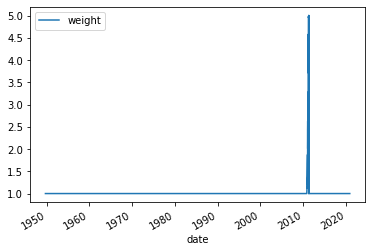

In [ ]:
df.plot.line(x="date", y="weight")

In [ ]:
df["w_score"] = df["score"] / df["weight"]
df["w_score_p"] = df["score_p"] / df["weight"]
df["w_score_a"] = df["score_a"] / df["weight"]

### Descriptive Analysis of assigned Scores

In [ ]:
with pd.option_context(
    "display.max_colwidth",
    25,
    "display.precision",
    2,
    "display.float_format",
    lambda x: "%.2f" % x,
):
    print(
        df[
            [
                "PN_s",
                "PN_sp",
                "PN_sa",
                "AN_s",
                "AN_sp",
                "AN_sa",
                "CE_s",
                "CE_sp",
                "CE_sa",
                "NE_s",
                "NE_sp",
                "NE_sa",
                "score",
                "score_p",
                "score_a",
                "w_score",
                "w_score_p",
                "w_score_a",
                "weight",
            ]
        ].describe()
    )

          PN_s    PN_sp    PN_sa     AN_s    AN_sp    AN_sa     CE_s    CE_sp  \
count 24538.00 24538.00 24538.00 24538.00 24538.00 24538.00 24538.00 24538.00   
mean      0.04     0.03     0.01     0.03     0.01     0.02     0.03     0.02   
std       0.49     0.45     0.19     0.34     0.19     0.28     0.30     0.29   
min      -6.50    -6.50    -3.50    -4.30    -4.10    -4.30    -3.00    -3.00   
25%       0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
50%       0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
75%       0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
max       9.70     9.40     9.70     8.50     5.80     8.50     6.80     6.80   

         CE_sa     NE_s    NE_sp    NE_sa    score  score_p  score_a  w_score  \
count 24538.00 24538.00 24538.00 24538.00 24538.00 24538.00 24538.00 24538.00   
mean      0.00     0.15     0.12     0.03    -0.04    -0.05     0.01    -0.04   
std       0.10     0.73    